#**Intial Preparation of Data and Data Cleaning**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('F_pdcp_data_volume.csv')

In [4]:
print(df.head())

          id celltype              ecgi  fci  \
0  1,448,420    Macro  2708756710728193   23   
1  1,448,421    Macro  2708756710728194   23   
2  1,448,422    Macro  2708756710728195   23   
3  1,448,434    Macro  2708756710728705   23   
4  1,448,435    Macro  2708756710728707   23   

                             fileid             nsdid      rank  rat  rruid  \
0  af015e60caae3803e22a81ebb98497f8  MAV_CU_NSD_MNO_2  [R1-RO0]    1      1   
1  af015e60caae3803e22a81ebb98497f8  MAV_CU_NSD_MNO_2  [R1-RO0]    1      2   
2  af015e60caae3803e22a81ebb98497f8  MAV_CU_NSD_MNO_2  [R1-RO0]    1      3   
3  c951308a9a19b55ebeeba2ca9bf5b33b  MAV_CU_NSD_MNO_2  [R1-RO0]    1      7   
4  c951308a9a19b55ebeeba2ca9bf5b33b  MAV_CU_NSD_MNO_2  [R1-RO0]    1      9   

   spare1  ...  pdcp_user_data_volume_dl_all_qci  \
0       0  ...                           313.445   
1       0  ...                                 0   
2       0  ...                                 0   
3       0  ...              

In [7]:
df.head()

,id,celltype,ecgi,fci,fileid,nsdid,rank,rat,rruid,spare1,...,pdcp_user_data_volume_dl_all_qci,pdcp_user_data_volume_ul_all_qci,qcimax,qcimin,record_status,shared_id,vimid,vnfinstanceid,gbr,duid
0,"1,448,420",Macro,2708756710728193,23,af015e60caae3803e22a81ebb98497f8,MAV_CU_NSD_MNO_2,[R1-RO0],1,1,0,...,313.445,11.199,9,9,simple,5b1ee426-c4de-48b6-8616-835f3f38bde8,Openstack-10.1.3.4-admin-admin,Openstack-10.1.3.4-admin-admin-MAV_CU2;10.1.3.17,0,1
1,"1,448,421",Macro,2708756710728194,23,af015e60caae3803e22a81ebb98497f8,MAV_CU_NSD_MNO_2,[R1-RO0],1,2,0,...,0,0,9,9,simple,5b1ee426-c4de-48b6-8616-835f3f38bde8,Openstack-10.1.3.4-admin-admin,Openstack-10.1.3.4-admin-admin-MAV_CU2;10.1.3.17,0,1
2,"1,448,422",Macro,2708756710728195,23,af015e60caae3803e22a81ebb98497f8,MAV_CU_NSD_MNO_2,[R1-RO0],1,3,0,...,0,0,9,9,simple,5b1ee426-c4de-48b6-8616-835f3f38bde8,Openstack-10.1.3.4-admin-admin,Openstack-10.1.3.4-admin-admin-MAV_CU2;10.1.3.17,0,1
3,"1,448,434",Macro,2708756710728705,23,c951308a9a19b55ebeeba2ca9bf5b33b,MAV_CU_NSD_MNO_2,[R1-RO0],1,7,0,...,0,0,9,9,simple,ccf598a0-fe00-4faf-a3a8-82c9bccf7141,Openstack-10.1.3.4-admin-admin,Openstack-10.1.3.4-admin-admin-MAV_CU1;10.1.3.16,0,3
4,"1,448,435",Macro,2708756710728707,23,c951308a9a19b55ebeeba2ca9bf5b33b,MAV_CU_NSD_MNO_2,[R1-RO0],1,9,0,...,0,0,9,9,simple,ccf598a0-fe00-4faf-a3a8-82c9bccf7141,Openstack-10.1.3.4-admin-admin,Openstack-10.1.3.4-admin-admin-MAV_CU1;10.1.3.16,0,3


In [11]:
N = 3
# Select last 3 columns of dataframe
last_n_column  = df.iloc[: , -N:]
print(last_n_column)

                                          vnfinstanceid  gbr  duid
0      Openstack-10.1.3.4-admin-admin-MAV_CU2;10.1.3.17    0     1
1      Openstack-10.1.3.4-admin-admin-MAV_CU2;10.1.3.17    0     1
2      Openstack-10.1.3.4-admin-admin-MAV_CU2;10.1.3.17    0     1
3      Openstack-10.1.3.4-admin-admin-MAV_CU1;10.1.3.16    0     3
4      Openstack-10.1.3.4-admin-admin-MAV_CU1;10.1.3.16    0     3
...                                                 ...  ...   ...
26495  Openstack-10.1.3.4-admin-admin-MAV_CU2;10.1.3.17    0     1
26496  Openstack-10.1.3.4-admin-admin-MAV_CU2;10.1.3.17    0     1
26497  Openstack-10.1.3.4-admin-admin-MAV_CU2;10.1.3.17    0     1
26498  Openstack-10.1.3.4-admin-admin-MAV_CU1;10.1.3.16    0     3
26499  Openstack-10.1.3.4-admin-admin-MAV_CU1;10.1.3.16    0     3

[26500 rows x 3 columns]


In [13]:
#dataframe without (w/o) meta data
df_wo_meta=df[['starttime','ecgi','pdcp_user_data_volume_dl_all_qci', 'pdcp_user_data_volume_ul_all_qci']]

In [14]:
df_wo_meta.head()

,starttime,ecgi,pdcp_user_data_volume_dl_all_qci,pdcp_user_data_volume_ul_all_qci
0,"Jan 31, 2022 @ 23:55:00.000",2708756710728193,313.445,11.199
1,"Jan 31, 2022 @ 23:55:00.000",2708756710728194,0,0
2,"Jan 31, 2022 @ 23:55:00.000",2708756710728195,0,0
3,"Jan 31, 2022 @ 23:55:00.000",2708756710728705,0,0
4,"Jan 31, 2022 @ 23:55:00.000",2708756710728707,0,0


In [15]:
df_wo_meta['ecgi'].value_counts()

2708756710728193    3587
2708756710728194    3430
2708756710728705    3169
2708756710728707    3139
2708756710728195    3123
2708756710728706    2680
-                   2502
2708756710728451    1968
2708756710728449    1616
2708756710728450    1286
Name: ecgi, dtype: int64

In [16]:
# form into a dictionary 

values_rsrp = df_wo_meta['ecgi'].value_counts(dropna=False).keys().tolist()
counts_rsrp = df_wo_meta['ecgi'].value_counts(dropna=False).tolist()
value_dict_rsrp = dict(zip(values_rsrp, counts_rsrp))

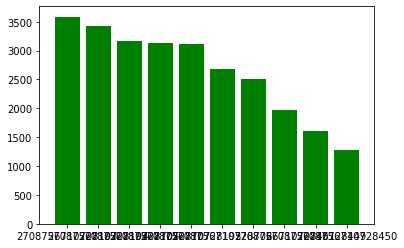

In [17]:
fig=plt.bar(list(value_dict_rsrp.keys()), value_dict_rsrp.values(), color='g')
plt.show()

In [ ]:
df_wo_meta.describe()

In [ ]:
#df['id'].values()

In [ ]:
# ECGI is the name of a cell, therefore it should be considered a category not a number
# starttime should be considered in date/time format

df_wo_meta['ecgi']=df_wo_meta['ecgi'].astype('category')

df_wo_meta['starttime']=pd.to_datetime(df_wo_meta['starttime'])



Now, we should expect the statistics of the data set to be meaningful

In [ ]:
df_wo_meta.describe()

#**Investigation of Min5 Average PDCP SDU Delay DL**

In [ ]:
global_PDCP_SDU_Delay_DL=df_wo_meta[['starttime', 'min5_average_pdcp_sdu_delay_dl']]

In [ ]:
global_PDCP_SDU_Delay_DL.head(10)

,starttime,min5_average_pdcp_sdu_delay_dl
0,2021-11-01 01:10:00,0.000000
1,2021-11-01 01:10:00,0.000000
2,2021-11-01 01:10:00,0.000000
3,2021-10-28 07:20:00,0.000000
4,2021-10-28 07:20:00,0.000000
5,2021-11-01 01:20:00,0.000000
6,2021-11-01 01:20:00,0.000000
7,2021-11-01 01:05:00,0.000000
8,2021-10-24 05:45:00,39.107143
9,2021-11-01 00:55:00,12.000000


In [ ]:
global_PDCP_SDU_Delay_DL['min5_average_pdcp_sdu_delay_dl'].value_counts()

0.000000      69224
12.000000       164
29.500000        34
11.000000        29
19.000000        20
              ...  
19.075321         1
26.483060         1
68.323200         1
33.951670         1
835.248700        1
Name: min5_average_pdcp_sdu_delay_dl, Length: 12293, dtype: int64

In [ ]:
values = global_PDCP_SDU_Delay_DL['min5_average_pdcp_sdu_delay_dl'].value_counts(dropna=False).keys().tolist()
counts = global_PDCP_SDU_Delay_DL['min5_average_pdcp_sdu_delay_dl'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

In [ ]:
value_dict

{0.0: 69224,
 12.0: 164,
 29.5: 34,
 11.0: 29,
 19.0: 20,
 16.0: 11,
 14.0: 10,
 41.5: 8,
 22.0: 8,
 13.0: 7,
 22.666666: 6,
 17.0: 6,
 20.6: 6,
 23.666666: 6,
 17.333334: 6,
 32.0: 6,
 26.333334: 5,
 17.833334: 5,
 50.0: 5,
 29.0: 5,
 44.5: 5,
 19.818182: 4,
 24.5: 4,
 71.5: 4,
 23.0: 4,
 27.0: 4,
 33.5: 4,
 17.084106: 4,
 19.75: 4,
 40.25: 4,
 60.0: 4,
 16.545835: 4,
 14.5: 4,
 21.0: 4,
 13.691615: 4,
 16.666666: 4,
 52.5: 4,
 25.0: 4,
 30.5: 4,
 20.75: 4,
 30.899258: 4,
 23.714285: 4,
 46.0: 3,
 23.136364: 3,
 31.0: 3,
 44.25: 3,
 28.0: 3,
 20.0: 3,
 32.276596: 3,
 28.555555: 3,
 18.0: 3,
 20.5: 3,
 37.5: 3,
 42.0: 3,
 17.666666: 3,
 36.0: 3,
 21.75: 3,
 31.666666: 3,
 15.5: 3,
 40.0: 3,
 54.0: 3,
 13.115152: 2,
 36.687176: 2,
 55.74154: 2,
 21.950165: 2,
 33.95483: 2,
 23.026783: 2,
 31.151201: 2,
 14.862528: 2,
 17.150253: 2,
 34.211273: 2,
 45.407463: 2,
 26.483799: 2,
 16.630842: 2,
 51.180737: 2,
 60.40525: 2,
 51.12564: 2,
 40.78321: 2,
 51.43375: 2,
 19.491224: 2,
 16.937399:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d66708290>]],
      dtype=object)

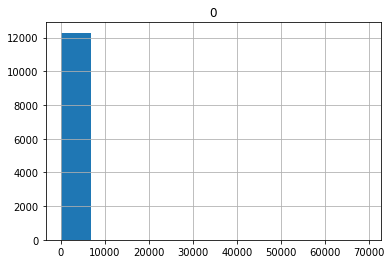

In [ ]:
# average every 5mins
PDCP_SDU_Delay_DL = pd.DataFrame([value_dict])
PDCP_SDU_Delay_DL = PDCP_SDU_Delay_DL.T
PDCP_SDU_Delay_DL.hist()

There are 69224 values of 0 which is why we can barely see anything else, let's remove it to more accurately see the other values of the distribution

global_PDCP_SDU_Delay_DL without 0's

In [ ]:
global_PDCP_SDU_Delay_DL_wo_zeros=global_PDCP_SDU_Delay_DL[global_PDCP_SDU_Delay_DL.min5_average_pdcp_sdu_delay_dl != 0]

In [ ]:
global_PDCP_SDU_Delay_DL_wo_zeros.head(10)

,starttime,min5_average_pdcp_sdu_delay_dl
8,2021-10-24 05:45:00,39.107143
9,2021-11-01 00:55:00,12.000000
41,2021-11-01 01:35:00,166.192410
49,2021-11-01 02:10:00,21.360000
52,2021-11-01 02:10:00,21.360000
62,2021-11-01 00:25:00,43.925087
64,2021-11-01 00:20:00,34.035454
65,2021-11-01 00:40:00,25.572289
66,2021-11-01 00:45:00,31.635635
67,2021-11-01 00:50:00,19.864239


In [ ]:
global_PDCP_SDU_Delay_DL_wo_zeros.describe()

,min5_average_pdcp_sdu_delay_dl
count,21712.000000
mean,38.767590
std,71.956922
min,8.000000
25%,17.523021
50%,23.119187
75%,36.632016
max,3019.965600


In [ ]:
values = global_PDCP_SDU_Delay_DL_wo_zeros['min5_average_pdcp_sdu_delay_dl'].value_counts(dropna=False).keys().tolist()
counts = global_PDCP_SDU_Delay_DL_wo_zeros['min5_average_pdcp_sdu_delay_dl'].value_counts(dropna=False).tolist()
value_dict_wo_zeroes = dict(zip(values, counts))

In [ ]:
value_dict_wo_zeroes

{12.0: 164,
 29.5: 34,
 11.0: 29,
 19.0: 20,
 16.0: 11,
 14.0: 10,
 22.0: 8,
 41.5: 8,
 13.0: 7,
 20.6: 6,
 17.0: 6,
 17.333334: 6,
 23.666666: 6,
 22.666666: 6,
 32.0: 6,
 26.333334: 5,
 44.5: 5,
 50.0: 5,
 29.0: 5,
 17.833334: 5,
 71.5: 4,
 23.0: 4,
 40.25: 4,
 52.5: 4,
 13.691615: 4,
 16.666666: 4,
 19.818182: 4,
 19.75: 4,
 23.714285: 4,
 27.0: 4,
 60.0: 4,
 33.5: 4,
 25.0: 4,
 16.545835: 4,
 30.5: 4,
 14.5: 4,
 30.899258: 4,
 17.084106: 4,
 20.75: 4,
 21.0: 4,
 24.5: 4,
 32.276596: 3,
 42.0: 3,
 37.5: 3,
 54.0: 3,
 46.0: 3,
 20.0: 3,
 17.666666: 3,
 36.0: 3,
 23.136364: 3,
 28.555555: 3,
 15.5: 3,
 20.5: 3,
 40.0: 3,
 31.666666: 3,
 31.0: 3,
 28.0: 3,
 18.0: 3,
 21.75: 3,
 44.25: 3,
 37.367317: 2,
 14.535551: 2,
 59.583645: 2,
 14.705941: 2,
 14.300175: 2,
 64.298: 2,
 87.058426: 2,
 16.504305: 2,
 79.84607: 2,
 66.548454: 2,
 22.854753: 2,
 81.74524: 2,
 15.119506: 2,
 15.462295: 2,
 44.10126: 2,
 31.1423: 2,
 14.264757: 2,
 37.989685: 2,
 21.25592: 2,
 14.91711: 2,
 28.312307: 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d66605310>]],
      dtype=object)

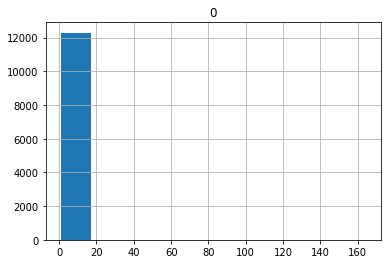

In [ ]:
# average every 5mins
PDCP_SDU_Delay_DL_WO_Zeroes = pd.DataFrame([value_dict_wo_zeroes])
PDCP_SDU_Delay_DL_WO_Zeroes = PDCP_SDU_Delay_DL_WO_Zeroes.T
PDCP_SDU_Delay_DL_WO_Zeroes.hist()

<BarContainer object of 12292 artists>

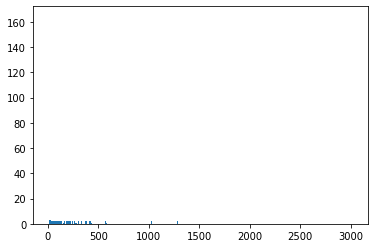

In [ ]:
value = value_dict_wo_zeroes.keys()
occurence = value_dict_wo_zeroes.values()

plt.bar(value, occurence)

In [ ]:
sorted(value_dict_wo_zeroes, key=value_dict_wo_zeroes.get, reverse=True)

[12.0,
 29.5,
 11.0,
 19.0,
 16.0,
 14.0,
 22.0,
 41.5,
 13.0,
 20.6,
 17.0,
 17.333334,
 23.666666,
 22.666666,
 32.0,
 26.333334,
 44.5,
 50.0,
 29.0,
 17.833334,
 71.5,
 23.0,
 40.25,
 52.5,
 13.691615,
 16.666666,
 19.818182,
 19.75,
 23.714285,
 27.0,
 60.0,
 33.5,
 25.0,
 16.545835,
 30.5,
 14.5,
 30.899258,
 17.084106,
 20.75,
 21.0,
 24.5,
 32.276596,
 42.0,
 37.5,
 54.0,
 46.0,
 20.0,
 17.666666,
 36.0,
 23.136364,
 28.555555,
 15.5,
 20.5,
 40.0,
 31.666666,
 31.0,
 28.0,
 18.0,
 21.75,
 44.25,
 37.367317,
 14.535551,
 59.583645,
 14.705941,
 14.300175,
 64.298,
 87.058426,
 16.504305,
 79.84607,
 66.548454,
 22.854753,
 81.74524,
 15.119506,
 15.462295,
 44.10126,
 31.1423,
 14.264757,
 37.989685,
 21.25592,
 14.91711,
 28.312307,
 24.567572,
 21.940739,
 40.98318,
 34.89284,
 16.342253,
 49.86737,
 53.094303,
 45.306442,
 19.889935,
 23.376827,
 35.26923,
 19.75198,
 38.130436,
 15.090482,
 15.713531,
 17.722536,
 20.572205,
 19.445055,
 39.599697,
 18.830706,
 26.31783,
 2

In [ ]:
value_dict_wo_zeroes

{12.0: 164,
 29.5: 34,
 11.0: 29,
 19.0: 20,
 16.0: 11,
 14.0: 10,
 22.0: 8,
 41.5: 8,
 13.0: 7,
 20.6: 6,
 17.0: 6,
 17.333334: 6,
 23.666666: 6,
 22.666666: 6,
 32.0: 6,
 26.333334: 5,
 44.5: 5,
 50.0: 5,
 29.0: 5,
 17.833334: 5,
 71.5: 4,
 23.0: 4,
 40.25: 4,
 52.5: 4,
 13.691615: 4,
 16.666666: 4,
 19.818182: 4,
 19.75: 4,
 23.714285: 4,
 27.0: 4,
 60.0: 4,
 33.5: 4,
 25.0: 4,
 16.545835: 4,
 30.5: 4,
 14.5: 4,
 30.899258: 4,
 17.084106: 4,
 20.75: 4,
 21.0: 4,
 24.5: 4,
 32.276596: 3,
 42.0: 3,
 37.5: 3,
 54.0: 3,
 46.0: 3,
 20.0: 3,
 17.666666: 3,
 36.0: 3,
 23.136364: 3,
 28.555555: 3,
 15.5: 3,
 20.5: 3,
 40.0: 3,
 31.666666: 3,
 31.0: 3,
 28.0: 3,
 18.0: 3,
 21.75: 3,
 44.25: 3,
 37.367317: 2,
 14.535551: 2,
 59.583645: 2,
 14.705941: 2,
 14.300175: 2,
 64.298: 2,
 87.058426: 2,
 16.504305: 2,
 79.84607: 2,
 66.548454: 2,
 22.854753: 2,
 81.74524: 2,
 15.119506: 2,
 15.462295: 2,
 44.10126: 2,
 31.1423: 2,
 14.264757: 2,
 37.989685: 2,
 21.25592: 2,
 14.91711: 2,
 28.312307: 2

### w/o 12

In [ ]:
global_PDCP_SDU_Delay_DL_wo_zeros.head()

,starttime,min5_average_pdcp_sdu_delay_dl
8,2021-10-24 05:45:00,39.107143
9,2021-11-01 00:55:00,12.000000
41,2021-11-01 01:35:00,166.192410
49,2021-11-01 02:10:00,21.360000
52,2021-11-01 02:10:00,21.360000


value_dict_wo_twelve dictionary exists accidentally deleted cell

In [ ]:
value_dict_wo_twelve;

In [ ]:
df12 = global_PDCP_SDU_Delay_DL_wo_zeros.loc[global_PDCP_SDU_Delay_DL_wo_zeros["min5_average_pdcp_sdu_delay_dl"] == 12 ]

In [ ]:
df12.head(100)

,starttime,min5_average_pdcp_sdu_delay_dl
